## 1.3 ggplot2 calls

The first two arguments to ggplot() are **data and mapping**.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘palmerpenguins’


The following objects are masked from ‘package:datasets’:

    penguins, penguins_raw




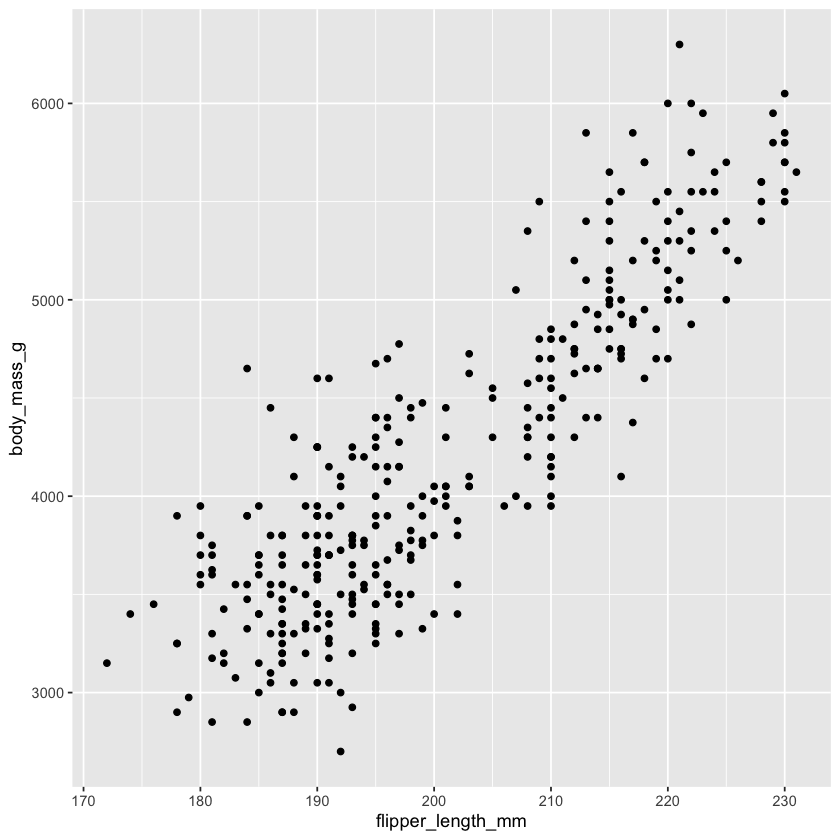

In [1]:
library(tidyverse)
library(palmerpenguins)

ggplot(penguins, aes(x = flipper_length_mm, y = body_mass_g)) + 
  geom_point(na.rm = TRUE)

## 1.4 Visualizing distributions

### 1.4.1 A categorical variable

A variable is categorical if it can only take one of a small set of values. To examine the distribution of a categorical variable, you can use a **bar chart**.

It’s often preferable to reorder the bars based on their frequencies. Doing so requires transforming the variable to a **factor** (how R handles categorical data) and then reordering the levels of that factor.

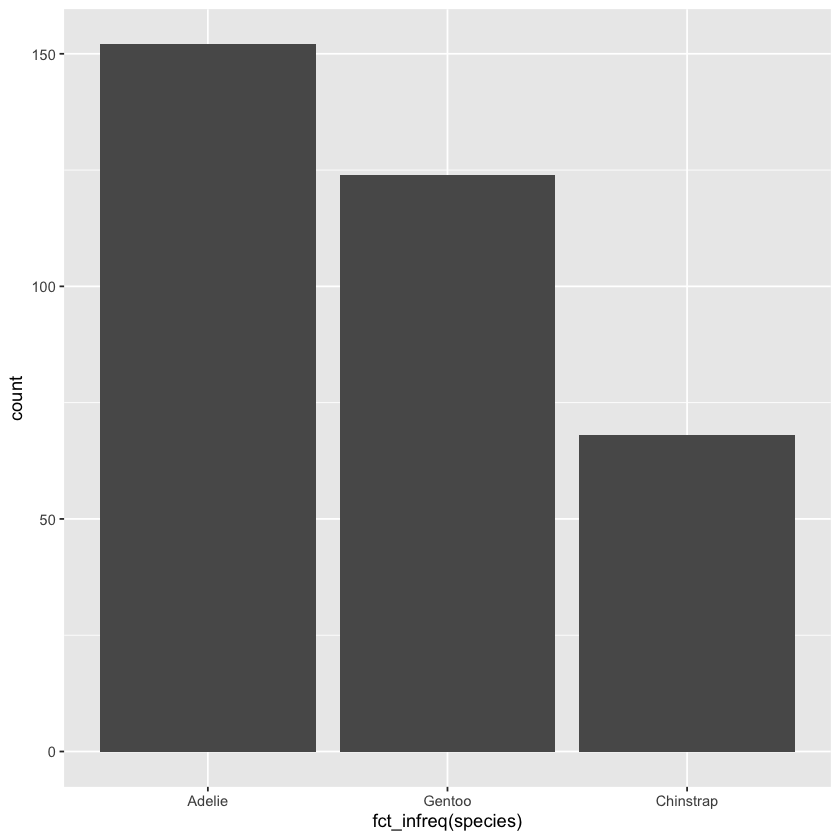

In [2]:
ggplot(penguins, aes(x = fct_infreq(species))) + # factor in order of increasing frequency
  geom_bar()

### 1.4.2 A numerical variable

A variable is numerical (or quantitative) if it can take on a wide range of numerical values, and it is sensible to add, subtract, or take averages with those values. Numerical variables can be continuous or discrete.

One commonly used visualization for distributions of continuous variables is a **histogram**.

A histogram divides the x-axis into equally spaced bins and then uses the height of a bar to display the number of observations that fall in each bin.

You can set the width of the intervals in a histogram with the **binwidth** argument, which is measured in the units of the x variable. You should always explore a variety of binwidths when working with histograms, as different binwidths can reveal different patterns.

An alternative visualization for distributions of numerical variables is a **density plot**. A density plot is a smoothed-out version of a histogram and a practical alternative, particularly for continuous data that comes from an underlying smooth distribution. 

It shows fewer details than a histogram but can make it easier to quickly glean the **shape of the distribution**, particularly with respect to **modes and skewness**.

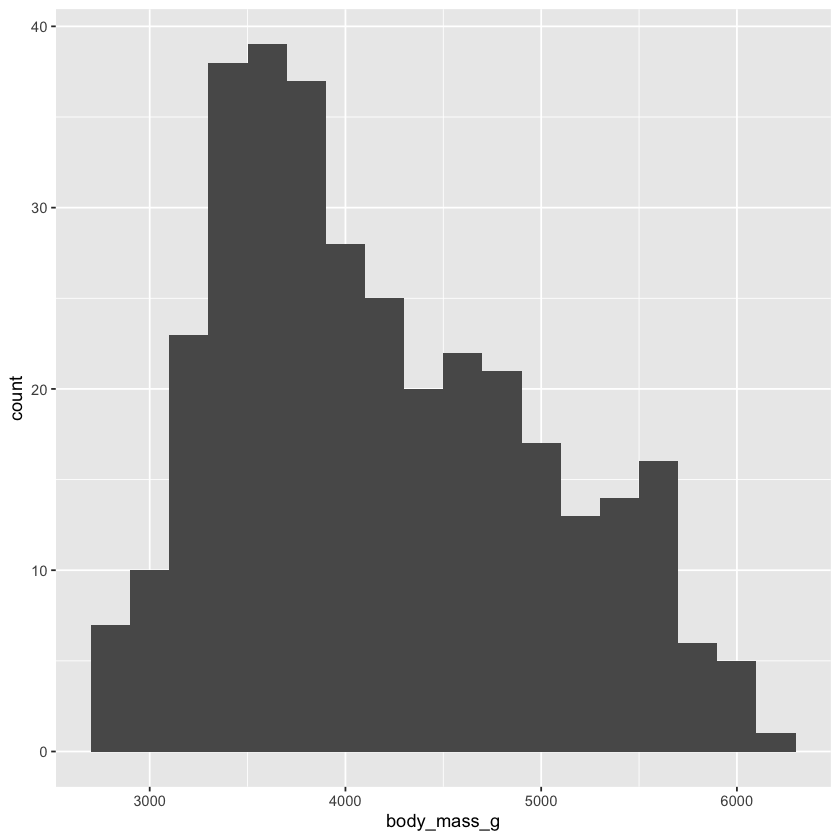

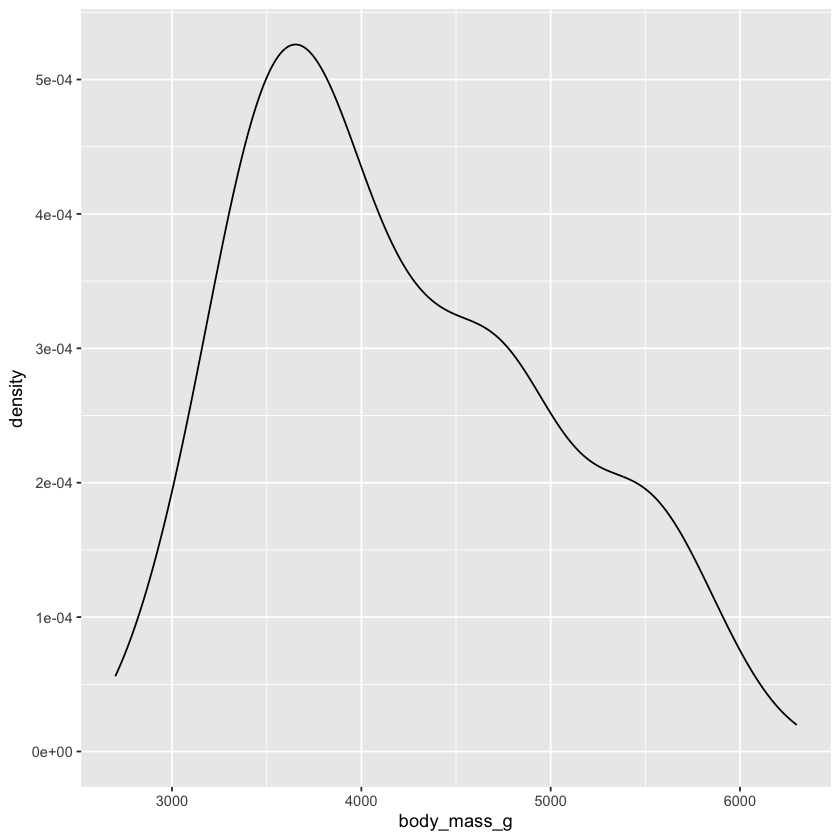

In [3]:
ggplot(penguins, aes(x = body_mass_g)) +
  geom_histogram(binwidth = 200, na.rm = TRUE)

ggplot(penguins, aes(x = body_mass_g)) +
  geom_density(na.rm = TRUE)

### 1.4.3 Exercises

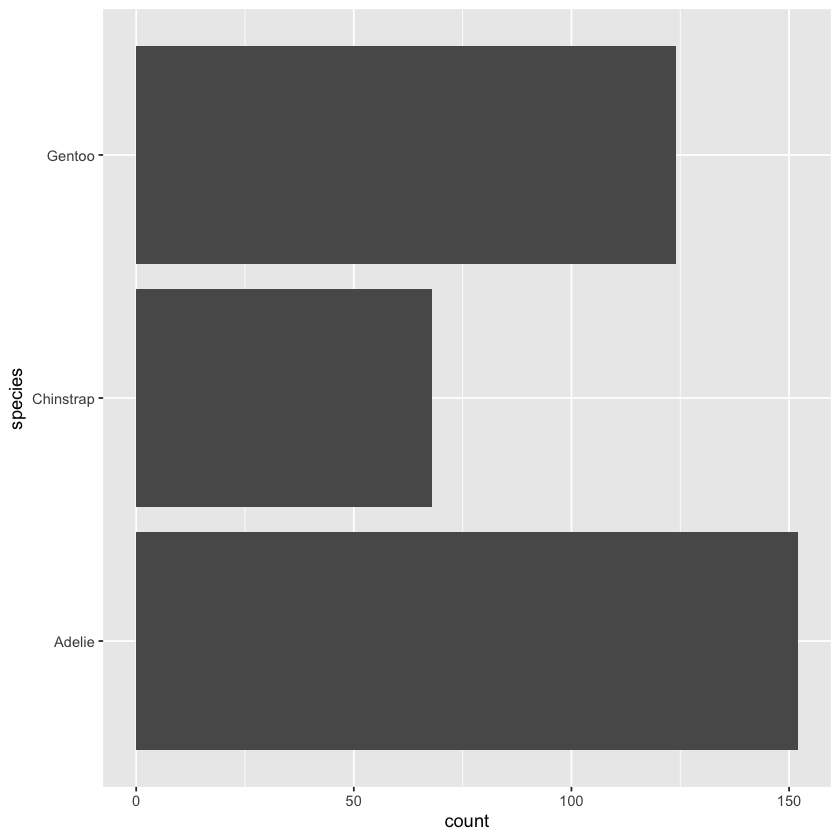

In [4]:
# 1. Make a bar plot of species of penguins, where you assign
# species to the y aesthetic. How is this plot different?

ggplot(penguins, aes(y = species)) + 
  geom_bar()

# this is horizontal

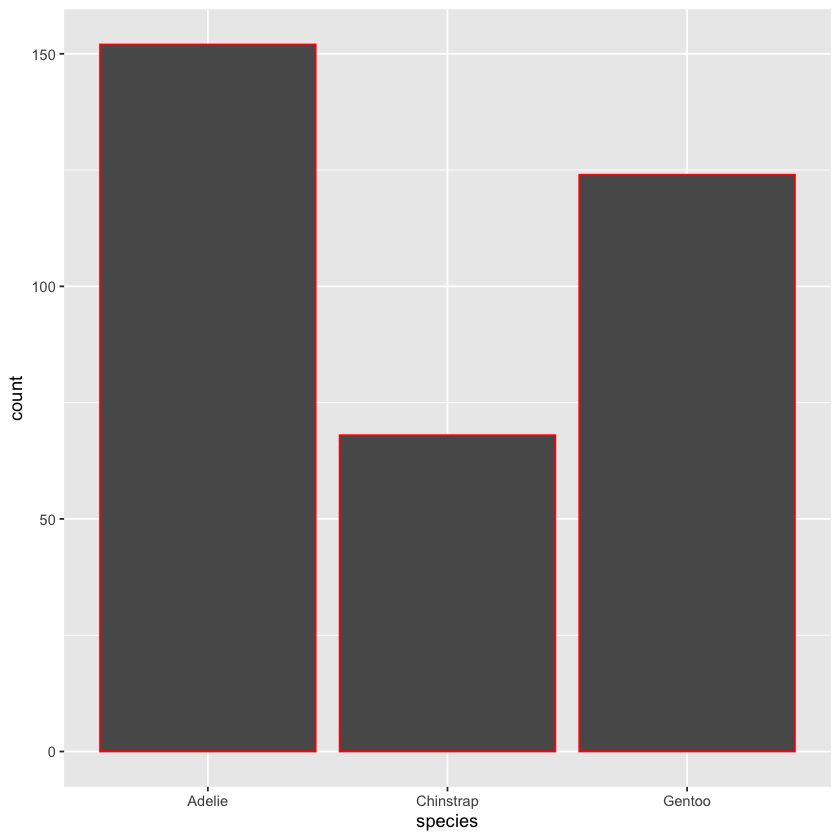

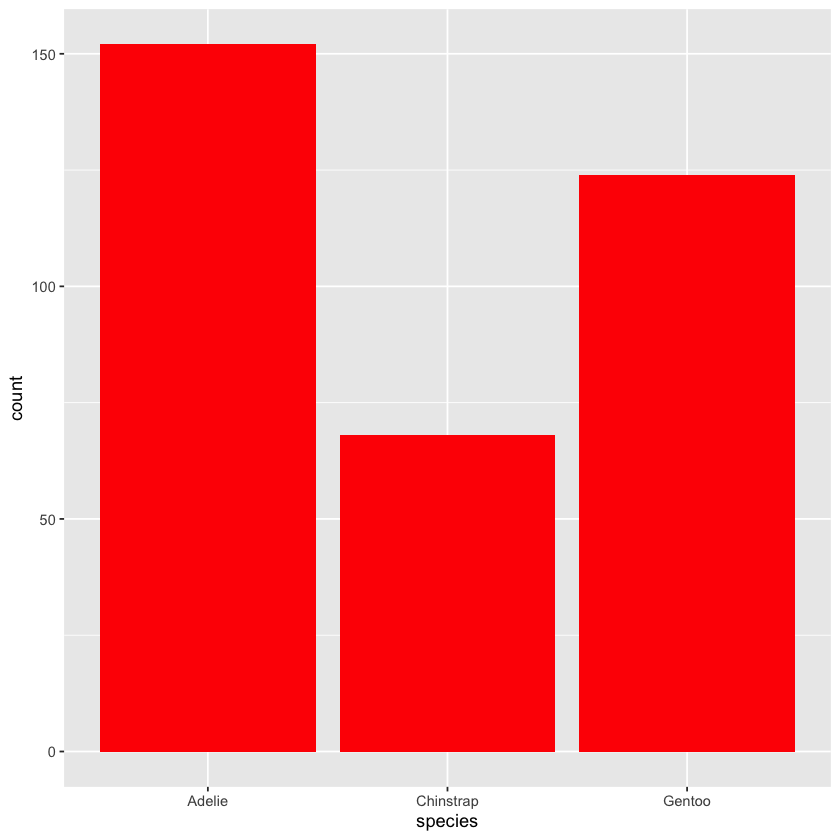

In [5]:
# 2. How are the following two plots different?
# Which aesthetic, color or fill, is more useful for changing the color of bars?

ggplot(penguins, aes(x = species)) +
  geom_bar(color = "red")

ggplot(penguins, aes(x = species)) +
  geom_bar(fill = "red")

# color makes the border of the bars red
# fill makes both the inside and border of the bars red, it is more useful

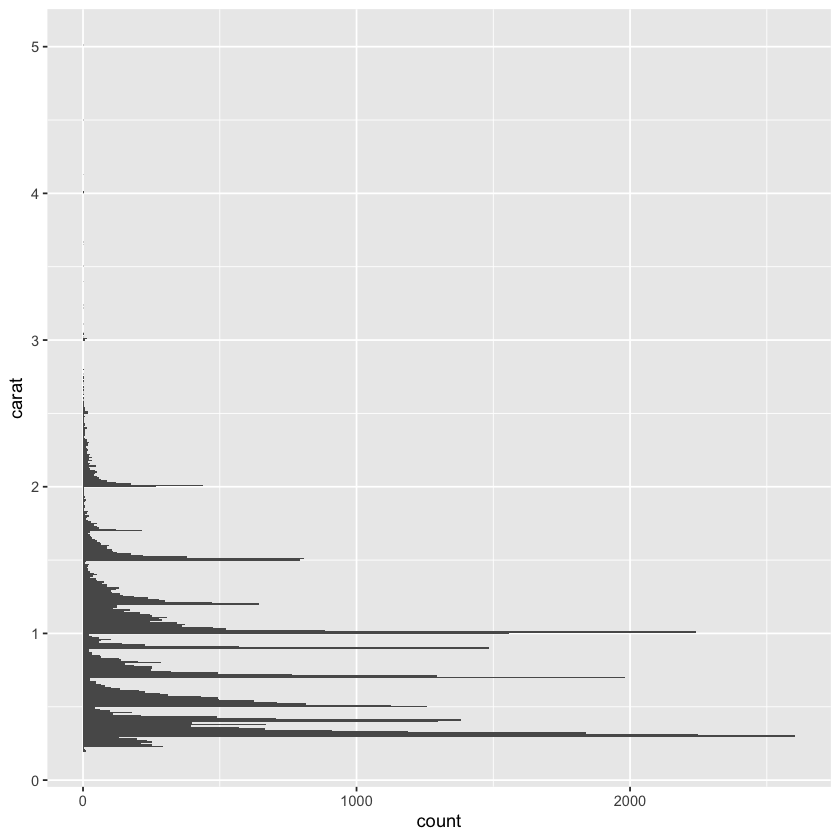

In [6]:
# 3. What does the bins argument in geom_histogram() do?

# bins: Number of bins. Overridden by binwidth. Defaults to 30.

# 4. Make a histogram of the carat variable in the diamonds dataset
# that is available when you load the tidyverse package.
# Experiment with different binwidths.
# What binwidth reveals the most interesting patterns?

ggplot(diamonds, aes(y = carat)) + 
  geom_histogram(binwidth = 0.01)

# 0.01 binwidth is better than the others

## 1.5 Visualizing relationships

### 1.5.1 A numerical and a categorical variable

<img src="https://r4ds.hadley.nz/images/EDA-boxplot.png" width=600px>

To visualize the relationship between a numerical and a categorical variable we can use **side-by-side box plots**. A boxplot is a type of visual shorthand for measures of **position (percentiles)** that describe a distribution. It is also useful for identifying **potential outliers**. Each boxplot consists of:

A box that indicates the range of the middle half of the data, a distance known as the **interquartile range (IQR)**, stretching from the 25th percentile of the distribution to the 75th percentile. In the middle of the box is a line that displays the median, i.e. 50th percentile, of the distribution. These three lines give you a sense of the **spread of the distribution** and whether or not the distribution is symmetric about the median or skewed to one side.

**Visual points** that display observations that fall more than 1.5 times the IQR from either edge of the box. These outlying points are unusual so are plotted individually.

A **line (or whisker)** that extends from each end of the box and goes to the farthest non-outlier point in the distribution.

*We map variables to aesthetics if we want the visual attribute represented by that aesthetic to vary based on the values of that variable. Otherwise, we set the value of an aesthetic.*

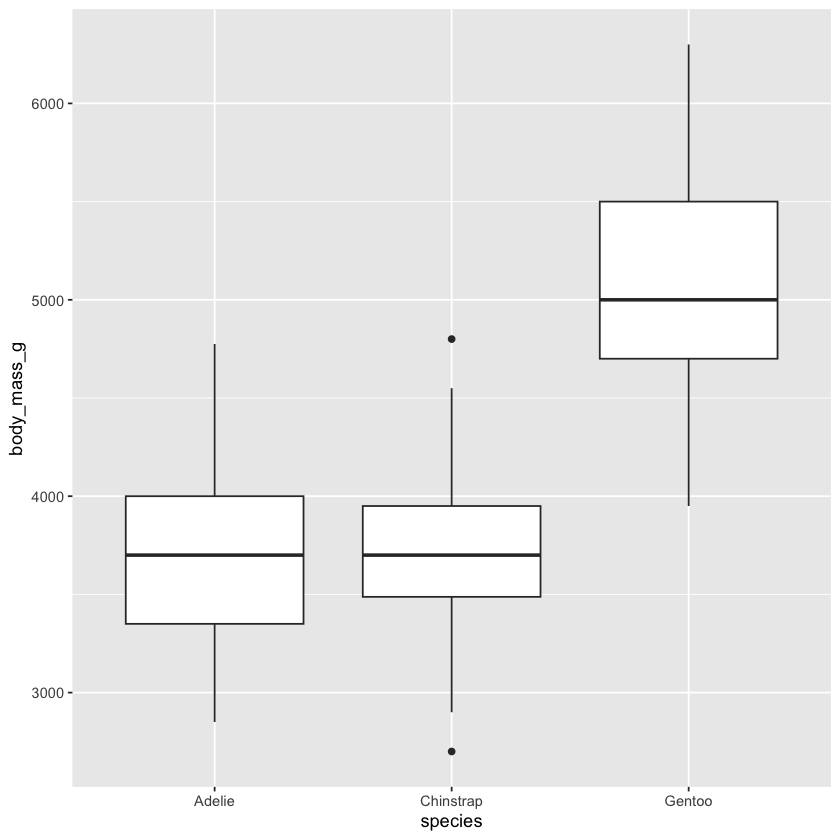

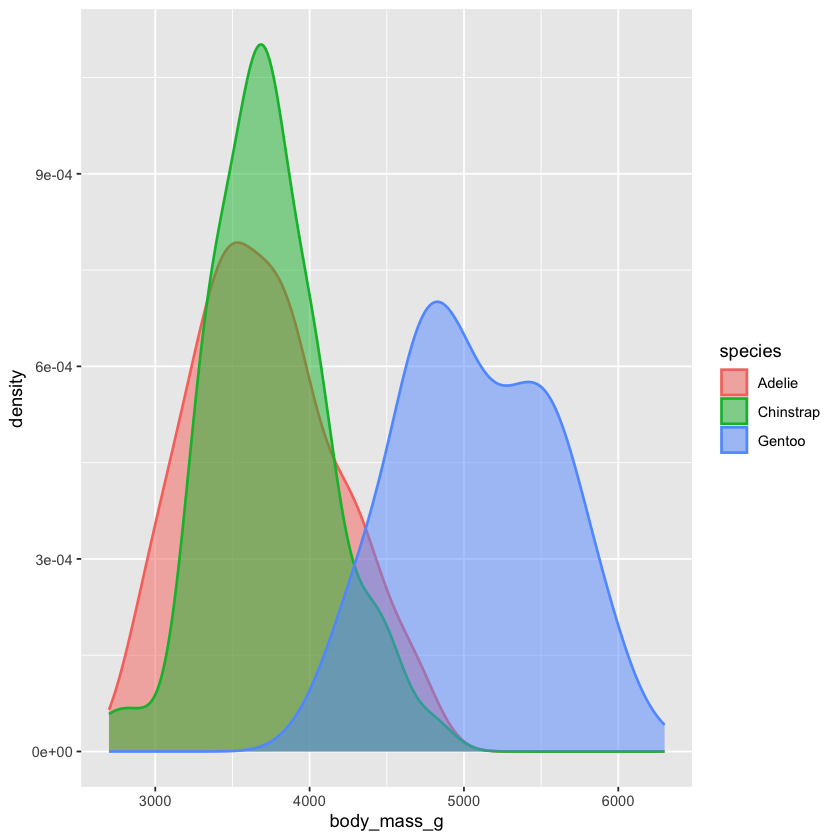

In [7]:
ggplot(penguins, aes(x = species, y = body_mass_g)) +
  geom_boxplot(na.rm = TRUE)

ggplot(penguins, aes(x = body_mass_g, color = species, fill = species)) +
  geom_density(linewidth = 0.75, alpha = 0.5, na.rm = TRUE) # the thickness of the lines

### 1.5.2 Two categorical variables

We can use **stacked bar plots** to visualize the relationship between two categorical variables.

For example, the following two stacked bar plots both display the relationship between island and species, or specifically, visualizing the distribution of species within each island.

In creating these bar charts, we map the variable that will be separated into bars to the x aesthetic, and the variable that will change the colors inside the bars to the fill aesthetic.

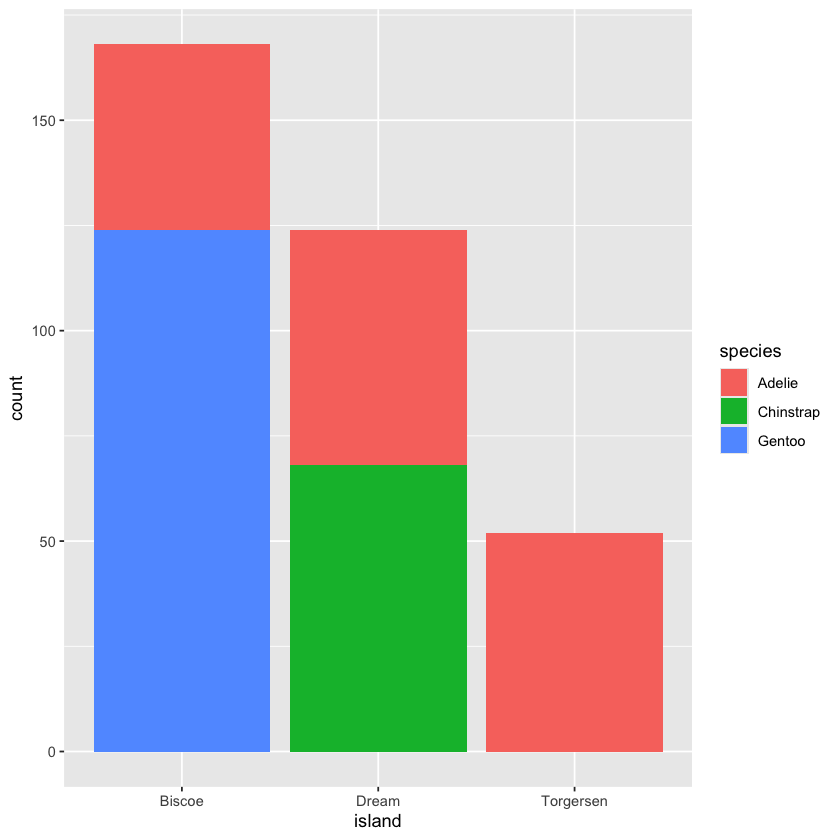

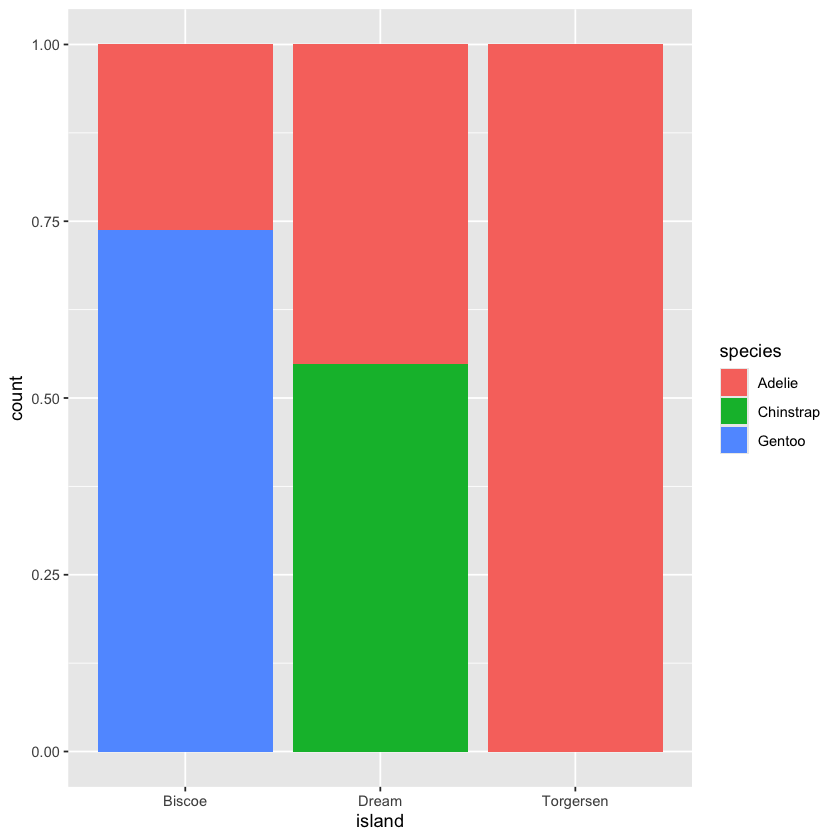

In [8]:
# frequencies of each species of penguins on each island
# with count on y
ggplot(penguins, aes(x = island, fill = species)) +
  geom_bar()

# a relative frequency plot
# more useful for comparing species distributions across island
ggplot(penguins, aes(x = island, fill = species)) +
  geom_bar(position = "fill")

### 1.5.3 Two numerical variables

A **scatterplot** is probably the most commonly used plot for visualizing the relationship between two numerical variables.

### 1.5.4 Three or more variables

A particularly useful way for categorical variables, is to split your plot into **facets**, **subplots** that each display one subset of the data.

To facet your plot by a single variable, use **facet_wrap()**. The first argument of facet_wrap() is a **formula**, which you create with ~ followed by a variable name. The variable that you pass to facet_wrap() should be **categorical**.

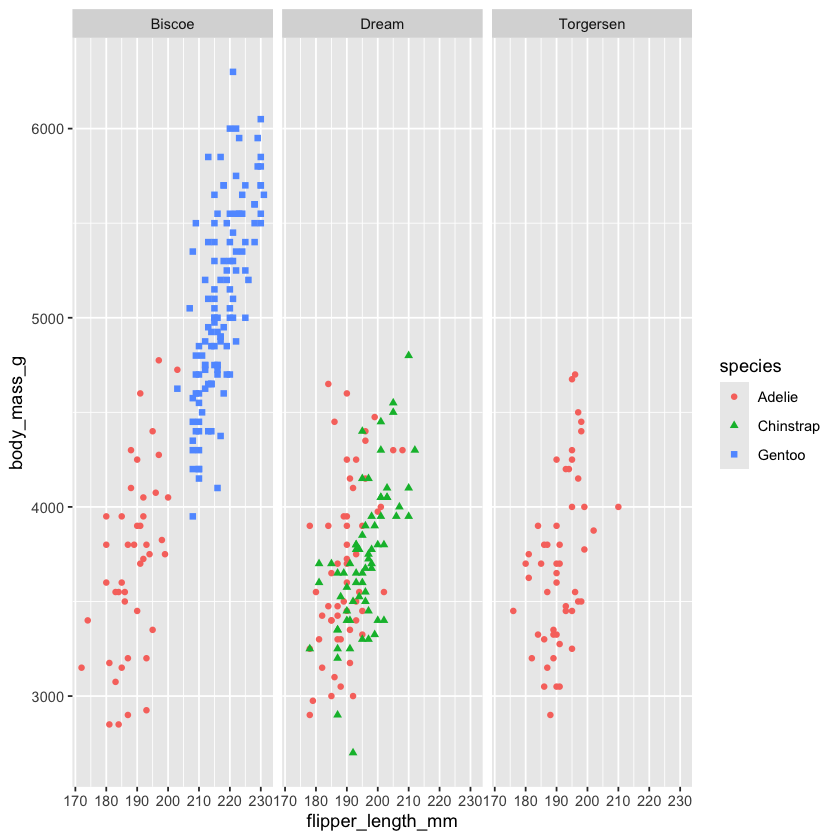

In [9]:
ggplot(penguins, aes(x = flipper_length_mm, y = body_mass_g)) +
  geom_point(aes(color = species, shape = species), na.rm = TRUE) +
  facet_wrap(~island)

### 1.5.5 Exercises

1. The mpg data frame that is bundled with the ggplot2 package contains 234 observations collected by the US Environmental Protection Agency on 38 car models. Which variables in mpg are categorical? Which variables are numerical? (Hint: Type ?mpg to read the documentation for the dataset.) How can you see this information when you run mpg?

**Categorical**: manufacturer, model, trans, drv, fl, class

**Numerical**: displ, year, cyl, cty, hwy

In [10]:
?mpg

mpg {ggplot2},R Documentation


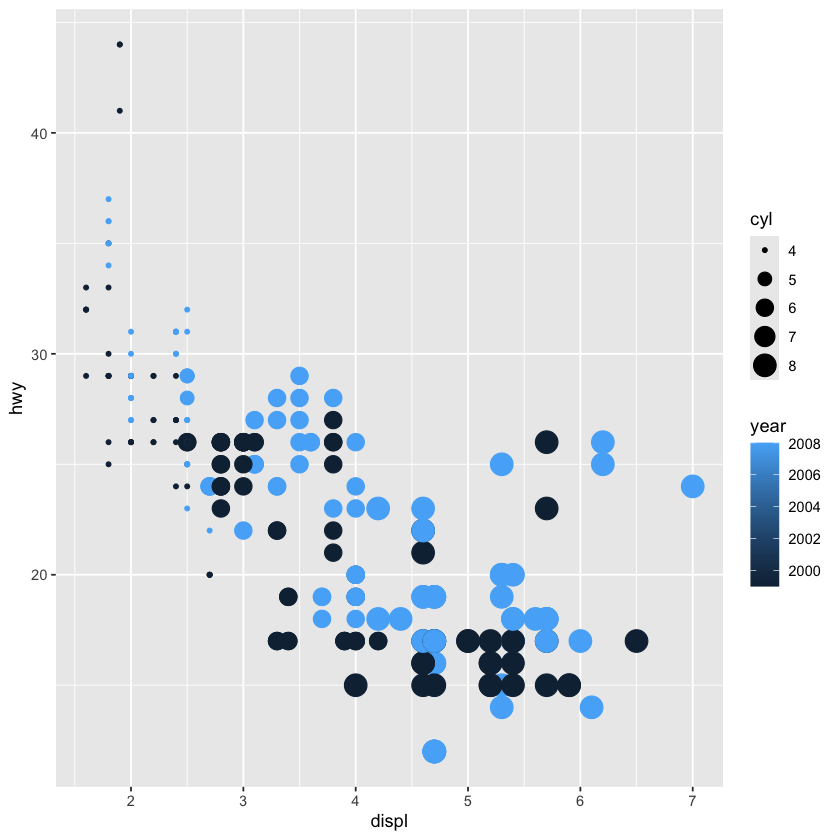

In [11]:
# 2. Make a scatterplot of hwy vs. displ using the mpg data frame.
# Next, map a third, numerical variable to color, then size,
# then both color and size, then shape.
# How do these aesthetics behave differently for categorical vs. numerical variables?

ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point(aes(color = year, size = cyl))

# A continuous variable cannot be mapped to the shape aesthetic.

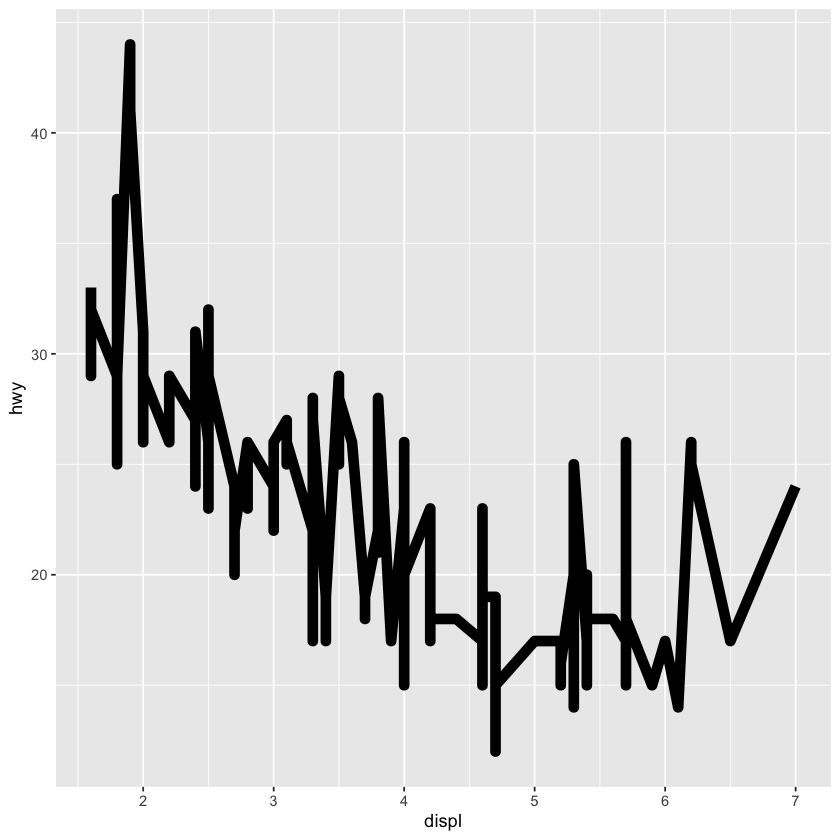

In [12]:
# 3. In the scatterplot of hwy vs. displ, what happens
# if you map a third variable to linewidth?

ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_line(linewidth = 3)

# it is not useful

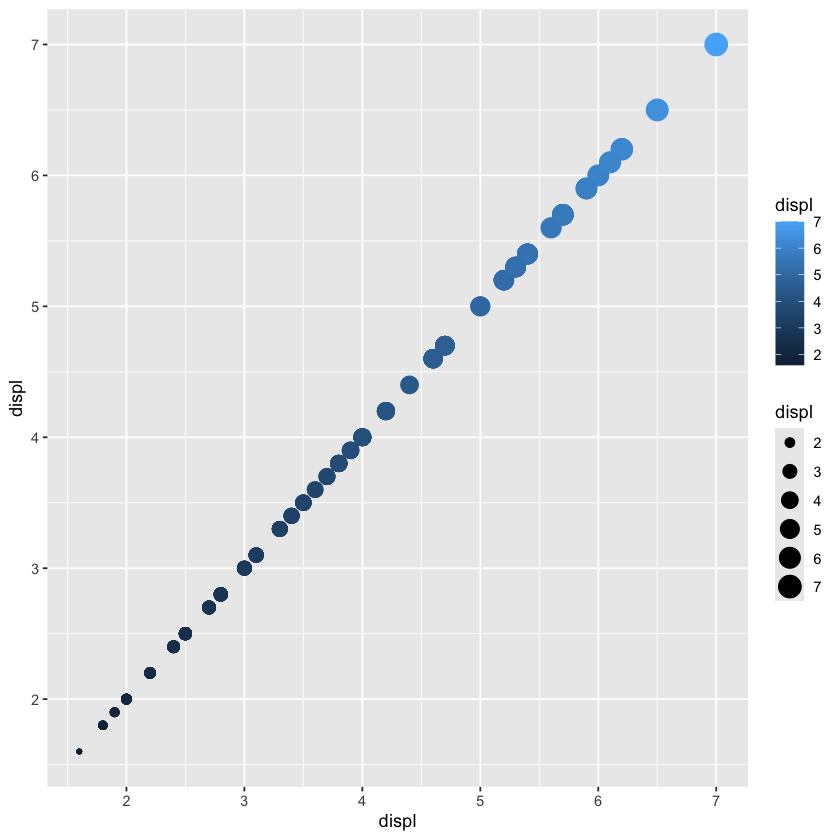

In [13]:
# 4. What happens if you map the same variable to multiple aesthetics?

ggplot(mpg, aes(x = displ, y = displ)) +
  geom_point(aes(color = displ, size = displ))

# not useful

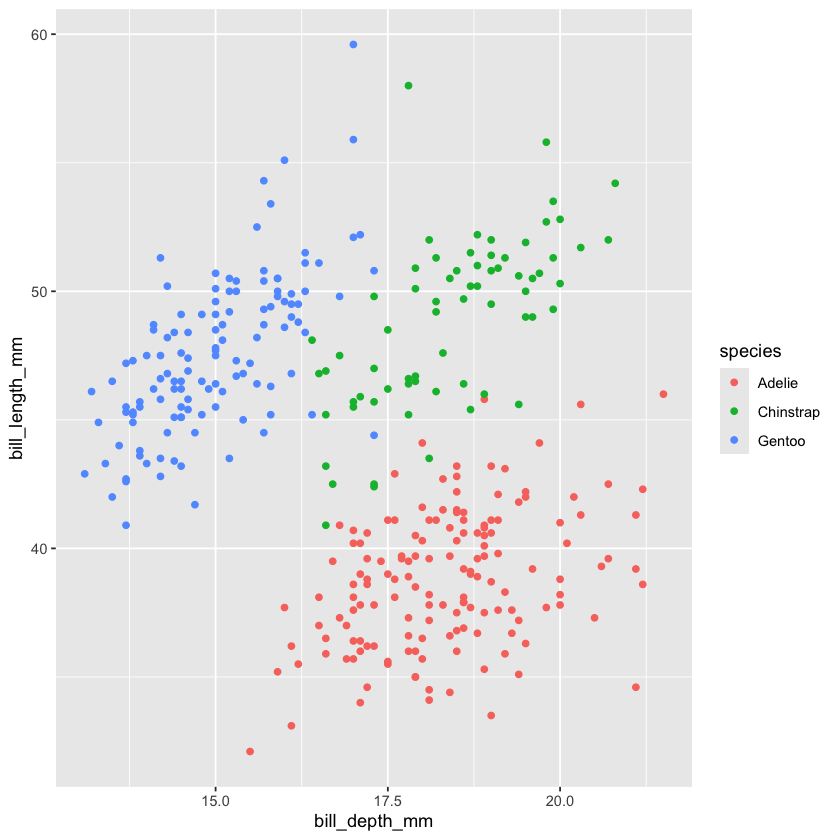

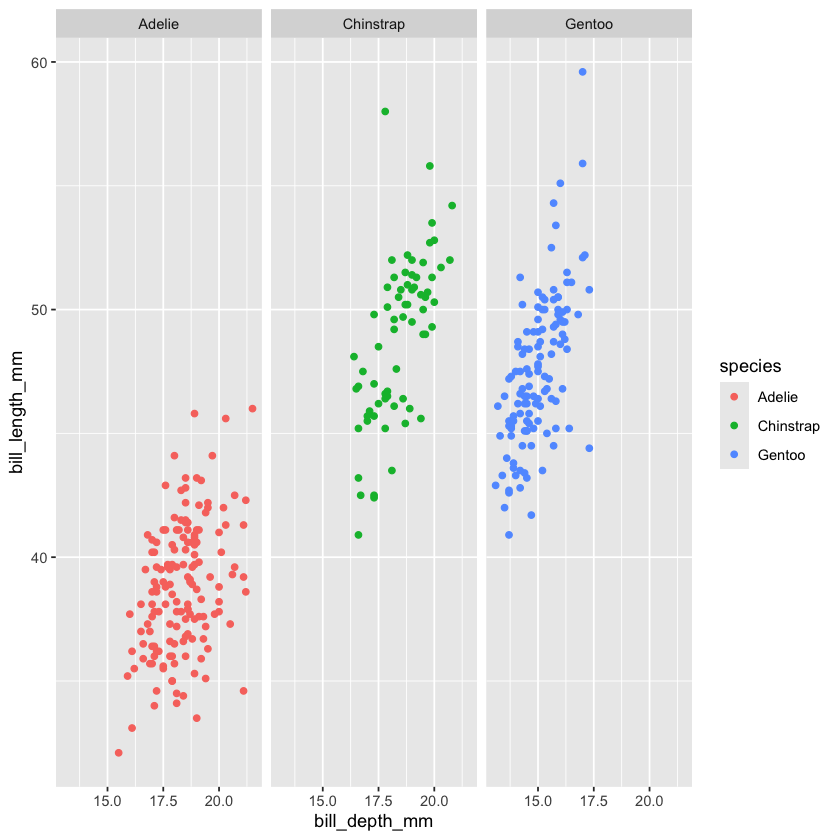

In [14]:
# 5. Make a scatterplot of bill_depth_mm vs. bill_length_mm and
# color the points by species. What does adding coloring by species
# reveal about the relationship between these two variables?
# What about faceting by species?

ggplot(penguins, aes(x = bill_depth_mm, y = bill_length_mm)) + 
  geom_point(aes(color = species), na.rm = TRUE)

ggplot(penguins, aes(x = bill_depth_mm, y = bill_length_mm)) +
  geom_point(aes(color = species), na.rm = TRUE) +
  facet_wrap(~species)

# first one is more useful than the second one
# in first one you can clearly see Chinstrap has bigger bill length and bill depth

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


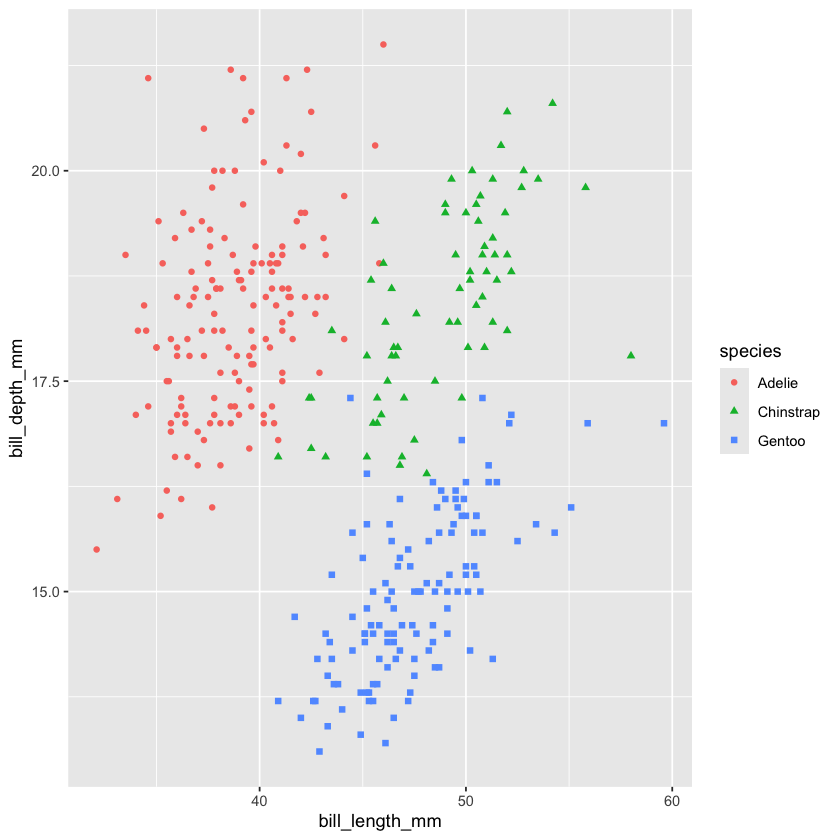

In [15]:
# 6. Why does the following yield two separate legends?
# How would you fix it to combine the two legends?

ggplot(
  data = penguins,
  mapping = aes(
    x = bill_length_mm, y = bill_depth_mm, 
    color = species, shape = species
  )
) +
  geom_point() +
  labs(color = "species")

# because of uppercase and lowercase inconsistency
# i changed color = "Species" to color = "species"

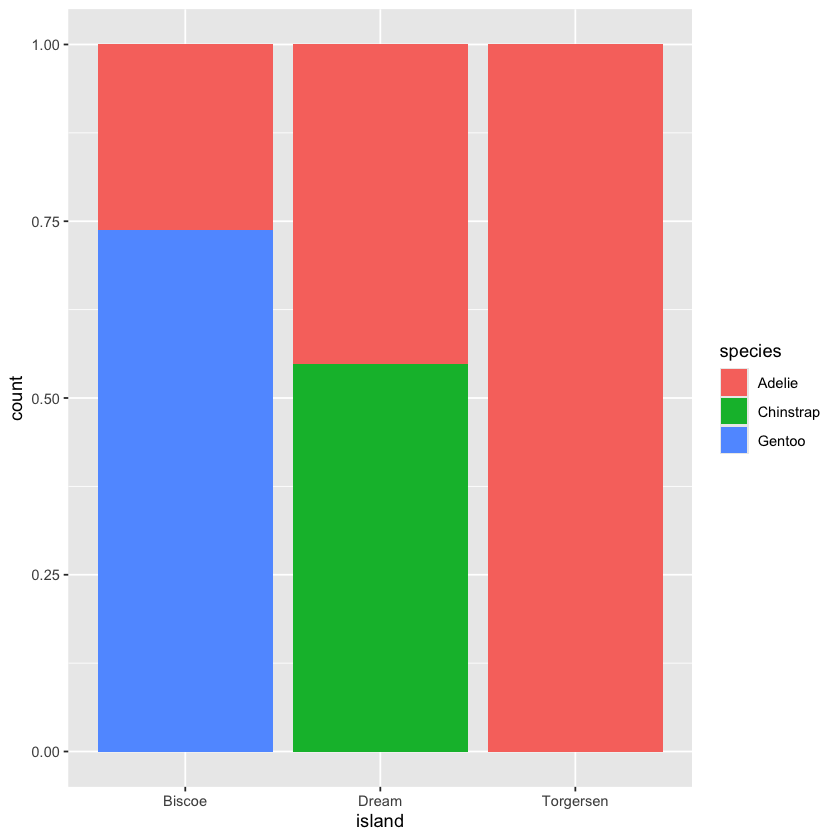

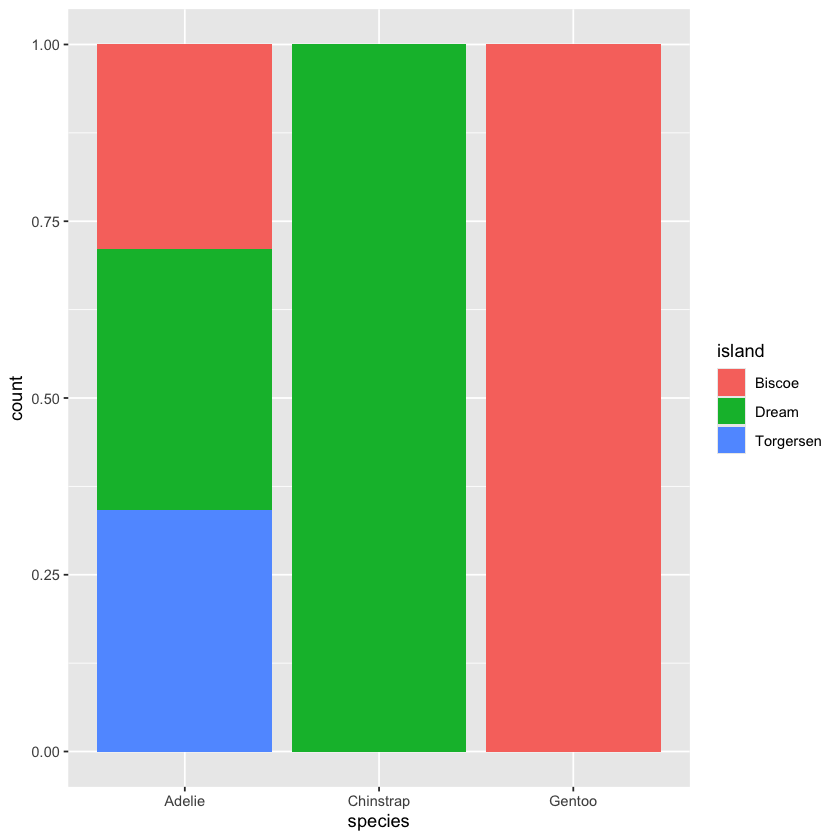

In [16]:
# 7. Create the two following stacked bar plots.
# Which question can you answer with the first one?
# Which question can you answer with the second one?

ggplot(penguins, aes(x = island, fill = species)) +
  geom_bar(position = "fill")
ggplot(penguins, aes(x = species, fill = island)) +
  geom_bar(position = "fill")

# 1. for every island, percentage distribution of species living on that island
# 2. for every species, distribution of different island that specific species is living

## 1.6 Saving your plots

`ggsave(filename = "penguin-plot.png")`

This will save your plot to your working directory.

If you don’t specify the width and height they will be taken from the dimensions of the current plotting device.

`ggsave(filename = "penguin-plot.pdf")`